### Linear Activation Function

We saw the problem with the step function, the gradient of the function became zero. This is because there is no component of x in the binary step function. Instead of a binary function, we can use a linear function. We can define the function as
 f(x)=ax
 
Here the activation is proportional to the input.The variable ‘a’ in this case can be any constant value. Let’s quickly define the function in python:



In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def linear_function(x):
    return 4*x

In [9]:
X = np.array([-2,6])
y = linear_function(X)

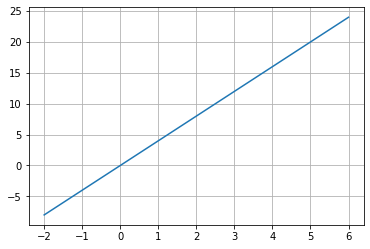

In [11]:
plt.plot(X,y)
plt.grid(True)
plt.show()

What do you think will be the derivative is this case? When we differentiate the function with respect to x, the result is the coefficient of x, which is a constant.

Although the gradient here does not become zero, but it is a constant which does not depend upon the input value x at all. This implies that the weights and biases will be updated during the backpropagation process but the updating factor would be the same.

In this scenario, the neural network will not really improve the error since the gradient is the same for every iteration. The network will not be able to train well and capture the complex patterns from the data. Hence, linear function might be ideal for simple tasks where interpretability is highly desired.

### Sigmoid Activation Function

The next activation function that we are going to look at is the Sigmoid function. It is one of the most widely used non-linear activation function. Sigmoid transforms the values between the range 0 and 1. Here is the mathematical expression for sigmoid-

f(x) = 1/(1+e^-x)

A noteworthy point here is that unlike the binary step and linear functions, sigmoid is a non-linear function. This essentially means -when I have multiple neurons having sigmoid function as their activation function,the output is non linear as well. Here is the python code for defining the function in python-

In [16]:
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z

In [39]:
X = np.linspace(-6,6,100)
y = sigmoid_function(X)

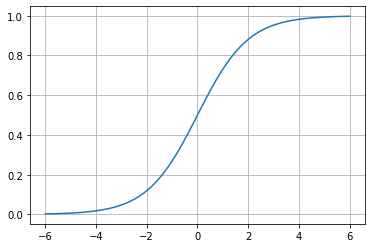

In [41]:
plt.plot(X,y)
plt.grid(True)
plt.show()

Additionally, as you can see in the graph above, this is a smooth S-shaped function and is continuously differentiable. The derivative of this function comes out to be ( sigmoid(x)*(1-sigmoid(x)). Let’s look at the plot of it’s gradient.

 f'(x) = sigmoid(x)*(1-sigmoid(x))
 
The gradient values are significant for range -3 and 3 but the graph gets much flatter in other regions. This implies that for values greater than 3 or less than -3, will have very small gradients. As the gradient value approaches zero, the network is not really learning.

Additionally, the sigmoid function is not symmetric around zero. So output of all the neurons will be of the same sign. This can be addressed by scaling the sigmoid function which is exactly what happens in the tanh function. Let’s read on.

### Tanh

The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin. The range of values in this case is from -1 to 1. Thus the inputs to the next layers will not always be of the same sign. The tanh function is defined as-

 tanh(x)=2sigmoid(2x)-1
 
In order to code this is python, let us simplify the previous expression.

In [43]:
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z

In [44]:
X_t = np.linspace(-10,10,100)
y_t = tanh_function(X_t)

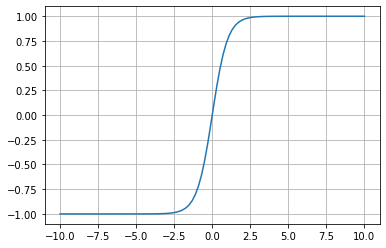

In [45]:
plt.plot(X_t,y_t)
plt.grid(True)
plt.show()

As you can see, the range of values is between -1 to 1. Apart from that, all other properties of tanh function are the same as that of the sigmoid function. Similar to sigmoid, the tanh function is continuous and differentiable at all points.

Let’s have a look at the gradient of the tan h function.

The gradient of the tanh function is steeper as compared to the sigmoid function. You might be wondering, how will we decide which activation function to choose? Usually tanh is preferred over the sigmoid function since it is zero centered and the gradients are not restricted to move in a certain direction.

### ReLU
The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. The plot below will help you understand this better-

f(x)=max(0,x)

For the negative input values, the result is zero, that means the neuron does not get activated. Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh function.  Here is the python function for ReLU:

In [50]:
def relu_function(x):
    for vals in x:
        if x<0:
            return 0
        else:
            return x

In [52]:
X_r = np.array([-3,-2,-1,0,1,2,3,4,5,6])
y_r = relu_function(X_r)

In [ ]:
plt.plot(X_t,y_t)
plt.grid(True)
plt.show()

If you look at the negative side of the graph, you will notice that the gradient value is zero. Due to this reason, during the backpropogation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated. This is taken care of by the ‘Leaky’ ReLU function.